In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
data_train = pd.read_csv(r"F:\anaconda\EDA\Bigmart sales\train.csv")
data_test = pd.read_csv(r"F:\anaconda\EDA\Bigmart sales\test.csv")

In [130]:
print(data_train.shape)
print(data_test.shape)

(8523, 12)
(5681, 11)


In [131]:
data_train["source"] = "train"
data_test["source"] = "test"

In [132]:
data = pd.concat([data_train,data_test], ignore_index=True)

In [133]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [134]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [135]:
for val in data.Item_Type.unique():
    print('for val = {}, mean = {}'.format (val, data.Item_Weight [data.Item_Type == val].mean ()))

for val = Dairy, mean = 13.23835812964935
for val = Soft Drinks, mean = 11.788407960199033
for val = Meat, mean = 12.766103789126895
for val = Fruits and Vegetables, mean = 13.194406118776207
for val = Household, mean = 13.337976653696572
for val = Baking Goods, mean = 12.275211111111153
for val = Snack Foods, mean = 12.865732002419794
for val = Frozen Foods, mean = 12.569323404255385
for val = Breakfast, mean = 13.179111842105247
for val = Health and Hygiene, mean = 13.171739436619777
for val = Hard Drinks, mean = 11.576204620462056
for val = Canned, mean = 12.340829621380879
for val = Breads, mean = 11.152361516034995
for val = Starchy Foods, mean = 13.659757709251092
for val = Others, mean = 13.915723684210517
for val = Seafood, mean = 12.76027397260274


In [136]:
for val in data.Item_Identifier.unique()[:10]:
    print('for val = {}, mean = {}'.format (val, data.Item_Weight [data.Item_Identifier == val].mean ()))

for val = FDA15, mean = 9.299999999999999
for val = DRC01, mean = 5.920000000000001
for val = FDN15, mean = 17.5
for val = FDX07, mean = 19.2
for val = NCD19, mean = 8.93
for val = FDP36, mean = 10.394999999999998
for val = FDO10, mean = 13.650000000000002
for val = FDP10, mean = 19.0
for val = FDH17, mean = 16.2
for val = FDU28, mean = 19.2


In [137]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [139]:
print("Total entries are" , len(data.index))
print("Total columns are", len(data.columns))

Total entries are 14204
Total columns are 13


In [140]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [141]:
print("Missing values")

print("-"*70)

print("Item weight has {} missing values, which is {} % of total entries".format(data["Item_Weight"].
    isnull().sum(),np.round((data.Item_Weight.isnull().sum())/len(data.Item_Weight)*100)))

print("Outlet_Size has {} missing values, which is {} % of total entries".format(data["Outlet_Size"].
    isnull().sum(),np.round((data.Outlet_Size.isnull().sum())/len(data.Outlet_Size)*100)))

print("\n")

print("Item_Outlet sales showing {} missing values as this is from the test data".format(data["Item_Outlet_Sales"].
                                                                                         isnull().sum()))

Missing values
----------------------------------------------------------------------
Item weight has 2439 missing values, which is 17.0 % of total entries
Outlet_Size has 4016 missing values, which is 28.0 % of total entries


Item_Outlet sales showing 5681 missing values as this is from the test data


<AxesSubplot:>

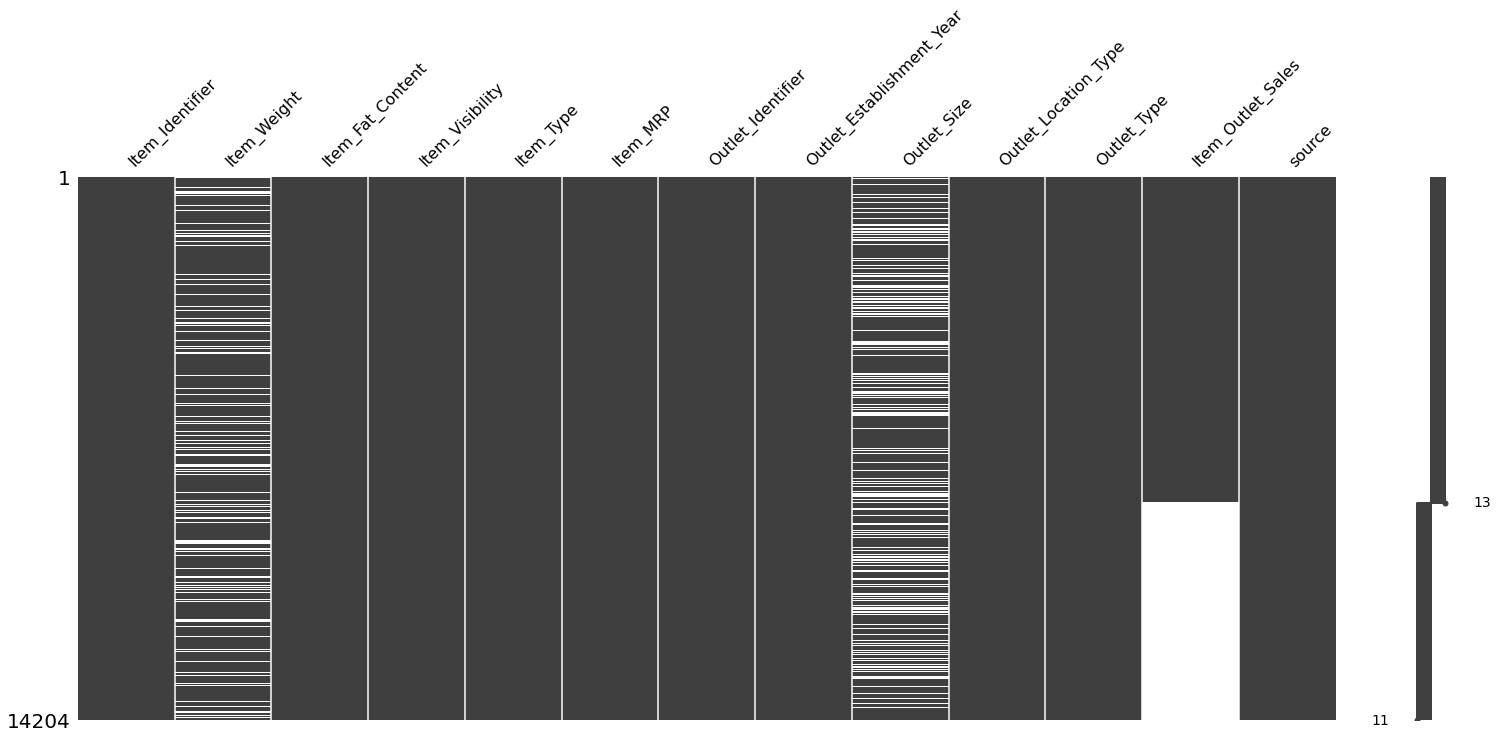

In [142]:
import missingno as msno

msno.matrix(data)

In [143]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


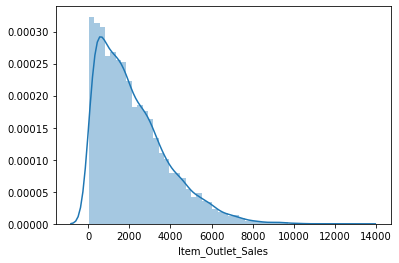

In [144]:
#plotting histogram for all continious variables
sns.distplot(data.Item_Outlet_Sales)
plt.show()

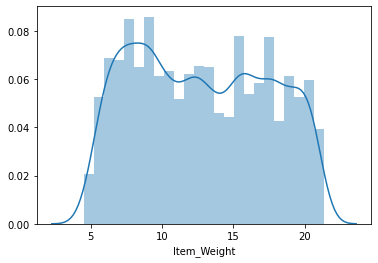

In [145]:
sns.distplot(data.Item_Weight)
plt.show()

In [146]:
data["Item_Weight"] = data["Item_Weight"].fillna(data['Item_Weight'].mean())
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

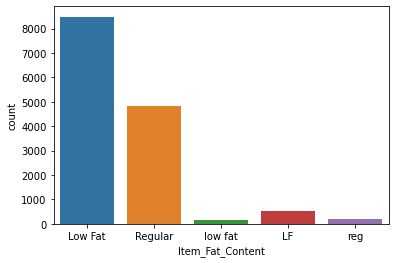

In [147]:
#ploting count plot for all catagorical variables
sns.countplot(data.Item_Fat_Content)

In [148]:
print(data.Item_Fat_Content.unique())
print("\n")
print(data.Item_Fat_Content.value_counts())


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [149]:
#replacing to common terms
data["Item_Fat_Content"] = data.Item_Fat_Content.str.replace("LF", "Low Fat")
data["Item_Fat_Content"] = data.Item_Fat_Content.str.replace("low fat", "Low Fat")

data["Item_Fat_Content"] = data.Item_Fat_Content.str.replace("reg", "Regular")

In [150]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

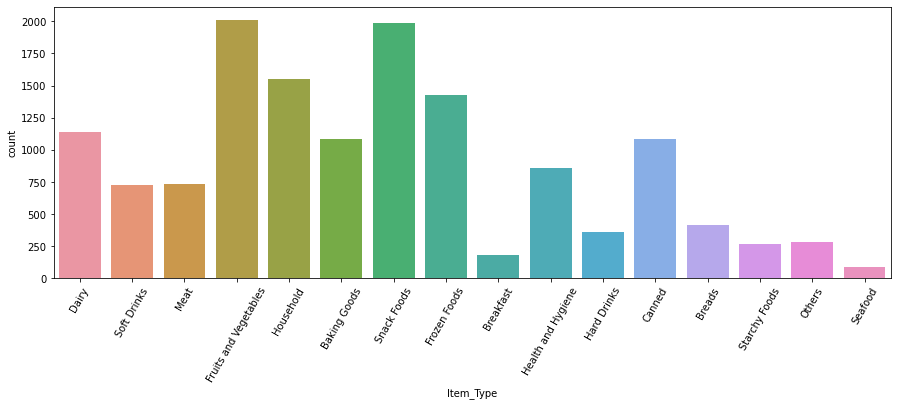

In [151]:
plt.subplots(figsize = (15,5))
sns.countplot(data.Item_Type)
plt.xticks(rotation = 60)
plt.show()

In [152]:
print(data.Item_Type.value_counts())

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


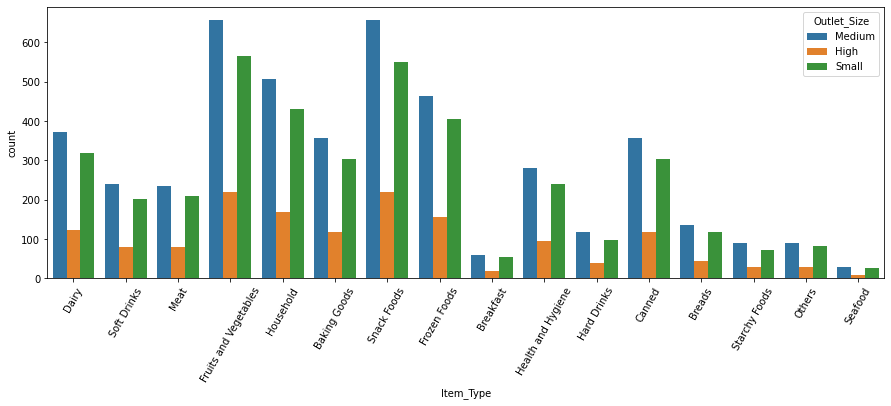

In [153]:
plt.subplots(figsize=(15,5))
sns.countplot(x = "Item_Type", data = data, hue="Outlet_Size")
plt.xticks(rotation = 60)
plt.show()

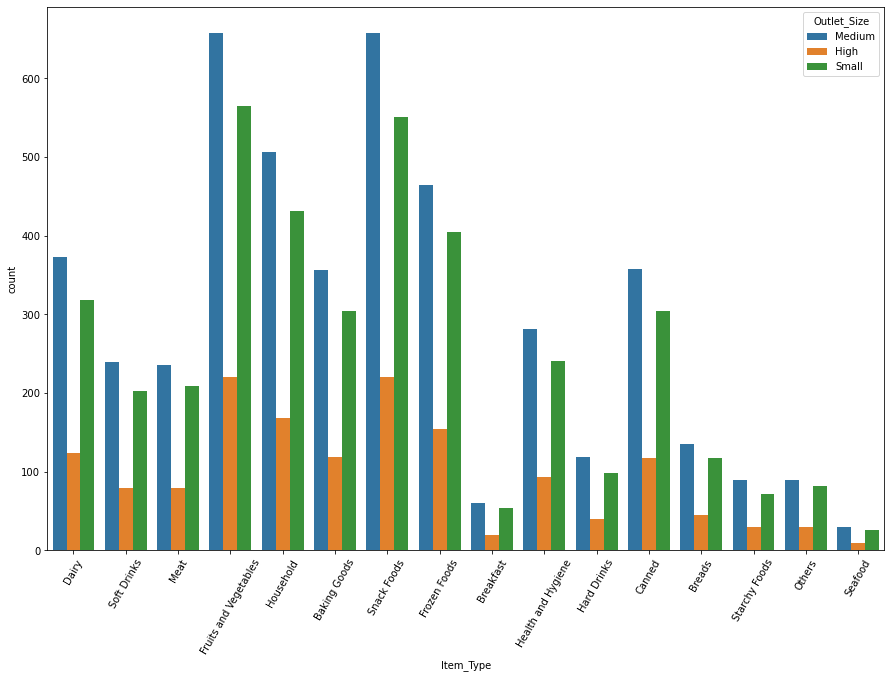

In [154]:
plt.subplots(figsize=(15,10))
sns.countplot(x = "Item_Type", data = data, hue = "Outlet_Size")
plt.xticks(rotation=60)
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

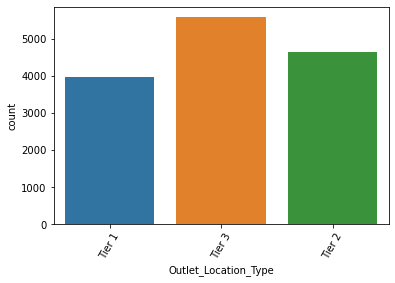

In [155]:
sns.countplot(data.Outlet_Location_Type)
plt.xticks(rotation=60)

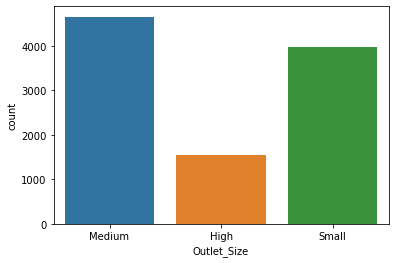

In [156]:
sns.countplot(data.Outlet_Size)
plt.show()

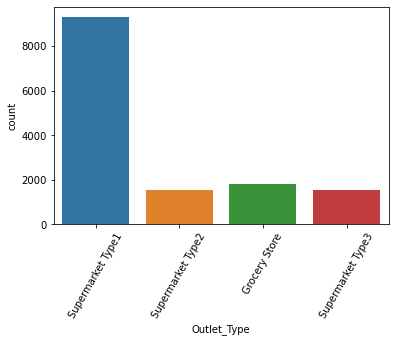

In [157]:
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=60)
plt.show()

In [158]:
NaN_data = data[data.Outlet_Size.isnull()]
NaN_data.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,train
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,train
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868,train
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028,train
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004,train
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384,train
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972,train


In [159]:
NaN_data.tail(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
13989,NCO14,9.600,Low Fat,0.029704,Household,44.6086,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
13990,NCR50,20.200,Low Fat,0.011887,Household,151.4340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
13991,DRM47,9.300,Low Fat,0.044033,Hard Drinks,191.1846,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
13992,FDO27,6.175,Regular,0.299739,Meat,96.1752,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test
13996,FDD52,18.250,Regular,0.183667,Dairy,108.6570,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
13997,FDO48,15.000,Regular,0.026993,Baking Goods,221.9456,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14009,FDI10,8.510,Regular,0.078563,Snack Foods,172.4422,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14013,FDN31,11.500,Low Fat,0.121989,Fruits and Vegetables,191.4530,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test
14016,FDF11,10.195,Regular,0.029511,Starchy Foods,239.6538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test
14019,FDZ26,11.600,Regular,0.144309,Dairy,239.5222,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


we can observe that when outlet type is grocery and outlet location type as Tear3 we have  outlet size NaN 

also when outlet type is super market type 1 and outlet location type as Tear2 we have outlet size NaN 


In [160]:
NaN_data.groupby(["Outlet_Location_Type","Outlet_Type"])["Outlet_Size"].count()

Outlet_Location_Type  Outlet_Type      
Tier 2                Supermarket Type1    0
Tier 3                Grocery Store        0
Name: Outlet_Size, dtype: int64

In [161]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store         880
                      Supermarket Type1    3100
Tier 2                Supermarket Type1    1550
Tier 3                Grocery Store           0
                      Supermarket Type1    1553
                      Supermarket Type2    1546
                      Supermarket Type3    1559
Name: Outlet_Size, dtype: int64

In [162]:
data.groupby(["Outlet_Type",'Outlet_Size','Outlet_Identifier']).Outlet_Identifier.count()

Outlet_Type        Outlet_Size  Outlet_Identifier
Grocery Store      Small        OUT019                880
Supermarket Type1  High         OUT013               1553
                   Medium       OUT049               1550
                   Small        OUT035               1550
                                OUT046               1550
Supermarket Type2  Medium       OUT018               1546
Supermarket Type3  Medium       OUT027               1559
Name: Outlet_Identifier, dtype: int64

In [163]:
data.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [164]:
(data.Outlet_Identifier=='OUT010').value_counts()

False    13279
True       925
Name: Outlet_Identifier, dtype: int64

In [165]:
(data.Outlet_Identifier=='OUT045').value_counts()

False    12656
True      1548
Name: Outlet_Identifier, dtype: int64

In [166]:
(data.Outlet_Identifier=='OUT017').value_counts()

False    12661
True      1543
Name: Outlet_Identifier, dtype: int64

In [167]:
print("Missing values of outlet size are from Outlet_Identifier OUT010, OUT017 , OUT045 total missing values :" ,1543+1548+925)

Missing values of outlet size are from Outlet_Identifier OUT010, OUT017 , OUT045 total missing values : 4016


In [168]:
data.groupby(["Outlet_Location_Type", "Outlet_Type",'Outlet_Identifier',"Outlet_Establishment_Year", "Outlet_Size"]).Outlet_Size.count()

Outlet_Location_Type  Outlet_Type        Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size
Tier 1                Grocery Store      OUT019             1985                       Small           880
                      Supermarket Type1  OUT046             1997                       Small          1550
                                         OUT049             1999                       Medium         1550
Tier 2                Supermarket Type1  OUT035             2004                       Small          1550
Tier 3                Supermarket Type1  OUT013             1987                       High           1553
                      Supermarket Type2  OUT018             2009                       Medium         1546
                      Supermarket Type3  OUT027             1985                       Medium         1559
Name: Outlet_Size, dtype: int64

In [169]:
data.groupby(["Outlet_Location_Type", "Outlet_Type",'Outlet_Identifier',"Outlet_Establishment_Year"]).Outlet_Identifier.count()

Outlet_Location_Type  Outlet_Type        Outlet_Identifier  Outlet_Establishment_Year
Tier 1                Grocery Store      OUT019             1985                          880
                      Supermarket Type1  OUT046             1997                         1550
                                         OUT049             1999                         1550
Tier 2                Supermarket Type1  OUT017             2007                         1543
                                         OUT035             2004                         1550
                                         OUT045             2002                         1548
Tier 3                Grocery Store      OUT010             1998                          925
                      Supermarket Type1  OUT013             1987                         1553
                      Supermarket Type2  OUT018             2009                         1546
                      Supermarket Type3  OUT027             1985    

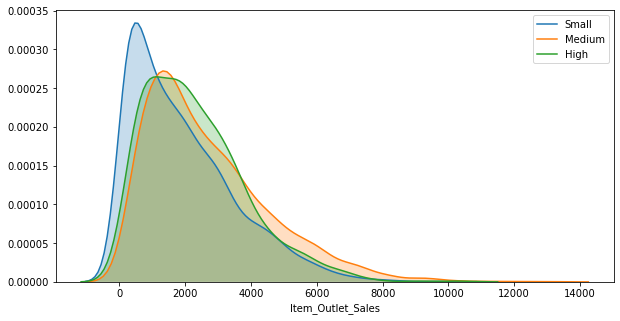

In [170]:
plt.figure (figsize = (10,5))
sns.distplot (data [data.Outlet_Size == "Small"].Item_Outlet_Sales, hist = False, kde_kws = {'shade' : True}, label = 'Small')
sns.distplot (data [data.Outlet_Size == "Medium"].Item_Outlet_Sales, hist = False, kde_kws = {'shade' : True}, label = 'Medium')
sns.distplot (data [data.Outlet_Size == "High"].Item_Outlet_Sales, hist = False, kde_kws = {'shade' : True}, label = 'High');

In [171]:
for val in data.Item_Identifier.unique()[:10]:
    print('for val = {}, mean = {}'.format (val, data.Item_Weight [data.Item_Identifier == val].mean ()))

for val = FDA15, mean = 9.688094914293888
for val = DRC01, mean = 6.683650469849444
for val = FDN15, mean = 16.558570845728998
for val = FDX07, mean = 18.488094914293885
for val = NCD19, mean = 9.359206025405001
for val = FDP36, mean = 10.694731778580621
for val = FDO10, mean = 13.478570845729001
for val = FDP10, mean = 17.758570845728997
for val = FDH17, mean = 15.442856495254441
for val = FDU28, mean = 17.918570845728997


In [172]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

data.Outlet_Size = data.apply(func)

In [173]:
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [174]:
data.drop("Outlet_Size", axis = True, inplace = True)

In [175]:
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,train


<AxesSubplot:>

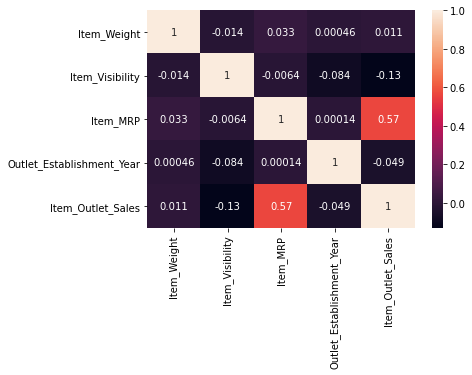

In [176]:
corrmat = data.corr()
sns.heatmap(corrmat, annot=True)

Based on above observation we can conclude that outlet_entablishment year show no correlationn with salesmm

In [177]:
data.drop(["Item_Identifier", "Outlet_Identifier","Outlet_Establishment_Year"], axis = 1, inplace=True)

In [178]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,9.30,Low Fat,0.016047,Dairy,249.8092,Tier 1,Supermarket Type1,3735.1380,train
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Tier 3,Supermarket Type2,443.4228,train
2,17.50,Low Fat,0.016760,Meat,141.6180,Tier 1,Supermarket Type1,2097.2700,train
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Tier 3,Grocery Store,732.3800,train
4,8.93,Low Fat,0.000000,Household,53.8614,Tier 3,Supermarket Type1,994.7052,train


In [179]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [180]:
data.Item_Fat_Content = le.fit_transform(data.Item_Fat_Content)

In [181]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,9.30,0,0.016047,Dairy,249.8092,Tier 1,Supermarket Type1,3735.1380,train
1,5.92,1,0.019278,Soft Drinks,48.2692,Tier 3,Supermarket Type2,443.4228,train
2,17.50,0,0.016760,Meat,141.6180,Tier 1,Supermarket Type1,2097.2700,train
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,Tier 3,Grocery Store,732.3800,train
4,8.93,0,0.000000,Household,53.8614,Tier 3,Supermarket Type1,994.7052,train


In [182]:
dummies1 = pd.get_dummies(data.Item_Type,drop_first=False)
dummies2 = pd.get_dummies(data.Outlet_Location_Type,drop_first=False)
dummies3 = pd.get_dummies(data.Outlet_Type,drop_first=False)

In [183]:
data = data.drop(["Item_Type", "Outlet_Location_Type", "Outlet_Type"], axis = 1)

In [184]:
data = pd.concat([data, dummies1,dummies2,dummies3], axis=1)

In [ ]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = data[['Item_Weight']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data.Item_Weight = pd.DataFrame(x_scaled)

In [185]:
data.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,source,Baking Goods,Breads,Breakfast,Canned,...,Snack Foods,Soft Drinks,Starchy Foods,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,3735.1380,train,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,443.4228,train,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0,0.016760,141.6180,2097.2700,train,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [186]:
data.shape

(14204, 29)

In [187]:
data_train = data[data.source == "train"].drop("source", axis=1)

In [188]:
variance = data_train.var().sort_values()

In [212]:
for i in variance:
    if variance > 1.109347e-01:
return variance

IndentationError: expected an indented block (<ipython-input-212-0d5ea2b2506b>, line 3)

In [190]:
data_train.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Snack Foods,Soft Drinks,Starchy Foods,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,3735.1380,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0,0.016760,141.6180,2097.2700,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [191]:
data_unseen = data[data.source == "test"]
data_unseen.drop(["Item_Outlet_Sales","source"], axis = 1, inplace=True)
data_unseen.head(3)

C:\Users\shishir\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,...,Snack Foods,Soft Drinks,Starchy Foods,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
8523,20.75,0,0.007565,107.8622,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
8524,8.30,1,0.038428,87.3198,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
8525,14.60,0,0.099575,241.7538,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [192]:
print(data_train.shape,data_test.shape)

(8523, 28) (5681, 12)


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [194]:
X = data_train.drop("Item_Outlet_Sales", axis =1)
y = data_train.Item_Outlet_Sales

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=0)

In [196]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
y_pred = lm.predict(X_test)

In [198]:
lm.score(X_test,y_test)

0.5620418111456392

In [199]:
from sklearn.metrics import r2_score

In [200]:
score = r2_score(y_test, y_pred)
score

0.5620418111456392

In [201]:
56.20


56.2